# 1. Classification
- 머신러닝/딥러닝에서 데이터가 어떤 범주(클래스)에 속하는지 예측하는 문제

# 2. Classification 실습

## IMDB
-  영화 리뷰 데이터, 리뷰에 대한 텍스트와 해당 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시한 레이블로 구성된 데이터

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, preprocessing

In [6]:
# 데이터 불러오기 (단어 개수 제한)
num_words = 10000
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=num_words)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
word_to_index = datasets.imdb.get_word_index()
index_to_word = {}

for key, value in word_to_index.items():
    index_to_word[value+3] = key

for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

print(' '.join([index_to_word[index] for index in x_train[0]]))

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <unk> is an amazing actor and now the same being director <unk> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <unk> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <unk> to the two little boy's that played the <unk> of norman and paul they were just brilliant children are often left out of the <unk> list i think because the stars that play them all grown up are such a big profile for the whole film but these chi

### Dataset EDA

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


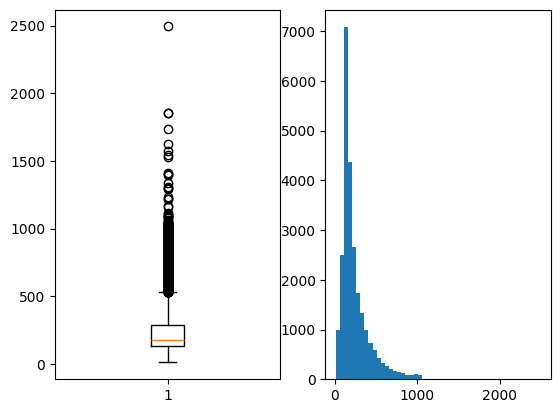

In [8]:
reviews_length = [len(review) for review in x_train]

print('리뷰의 최대 길이 : {}'.format(np.max(reviews_length)))
print('리뷰의 평균 길이 : {}'.format(np.mean(reviews_length)))

plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.subplot(1,2,2)
plt.hist(reviews_length, bins=50)
plt.show()

In [9]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))


각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


In [10]:
word_to_index = datasets.imdb.get_word_index()
index_to_word = {}

for key, value in word_to_index.items():
    index_to_word[value+3] = key

# IMDB 리뷰 데이터셋에서는 0, 1, 2, 3은 특별 토큰으로 취급
# 정수 4부터가 실제 IMDB 리뷰 데이터셋에서 빈도수가 가장 높은 실제 영단어

print('빈도수 상위 1등 단어 : {}'.format(index_to_word[4]))


빈도수 상위 1등 단어 : the


In [11]:
# ----------- complete the code ---------------------------
# 빈도수 상위 3938등 단어
print('빈도수 상위 3938등 단어 : {}'.format(index_to_word[3941]))

# ----------- complete the code ---------------------------

빈도수 상위 3938등 단어 : suited


### DNN을 사용하여 분류하기
신경망에 숫자 리스트를 주입할 수는 없음 -> 리스트를 텐서로 변환해야함


1.   리스트를 원-핫 인코딩(one-hot encoding)하여 0과 1의 벡터로 변환
2.   같은 길이가 되도록 리스트에 패딩(padding)을 추가하고(samples, sequence_length)크기의 정수 텐서로 변환 </br>-> 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째층(embedding 층)으로 사용




In [13]:
# data preprocessing (정수-> 이진 행렬)

def vectorize_sequences(sequences, dimension=10000):

    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.

    return results

train_data = vectorize_sequences(x_train)
test_data = vectorize_sequences(x_test)

print(x_train[0])
print(train_data)


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1.

In [27]:
# Dense층만 사용하여 신경망 모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import optimizers

# -----------complete the code -----------------
print(x_train.shape, y_train.shape)
model = Sequential([
      Dense(128, activation = 'sigmoid'),
      Dense(64 , activation = 'sigmoid'),
      Dense(1, activation = 'sigmoid') # 마지막 레이어 activation = sigmoid
])


# -----------complete the code -----------------

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

(25000,) (25000,)


In [28]:
# ------------- complete the code --------------
# 학습
history = model.fit(train_data, y_train, epochs = 100, batch_size = 512, verbose = 1)
loss, mae = model.evaluate(test_data, y_test, verbose = 0)
# ------------- complete the code --------------


Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.5730 - loss: 0.6781
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.7971 - loss: 0.5497
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.8463 - loss: 0.3972
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.8728 - loss: 0.3231
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.8880 - loss: 0.2798
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.8979 - loss: 0.2562
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.9056 - loss: 0.2393
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.9151 - loss: 0.2218
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9250 - loss: 0.2036
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.9283 - loss: 0.1947
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9292 - loss: 0.1904
Epoch 12/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step

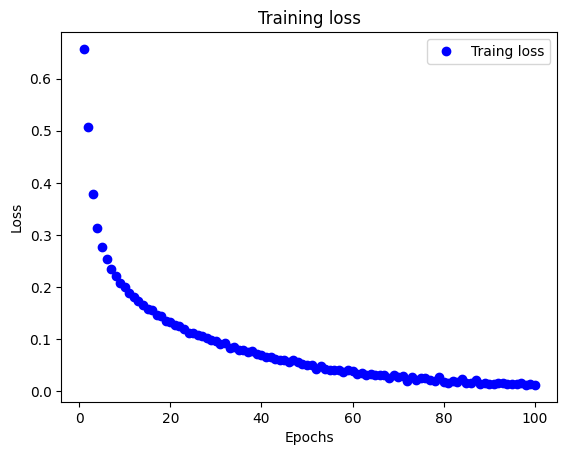

In [29]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']


epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Traing loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

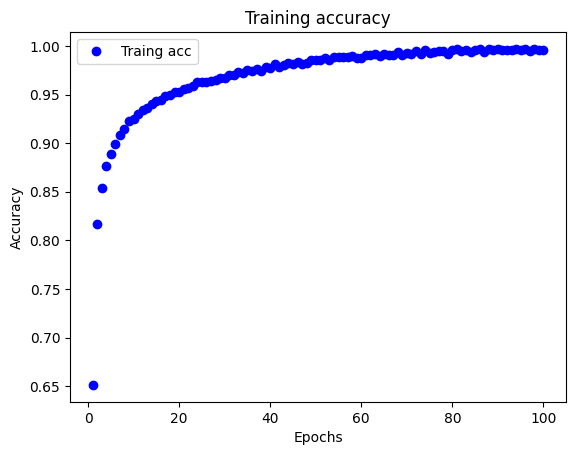

In [30]:
acc = history_dict['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'bo', label='Traing acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
# ------------- complete the code --------------
# 평가
loss, acc = model.evaluate(test_data, y_test, verbose=0)
# ------------- complete the code --------------

print("Test Accuracy:", acc)

Test Accuracy: 0.8454399704933167


### LSTM 사용하여 분류하기
- LSTM은 Long Short Term Memory의 줄임말로 기존의 순환 신경망(RNN)이 시퀀스(Sequence)가 긴 데이터에는 잘 맞지 않는다는 문제를 해결하기 위해 등장한 네트워크
- LSTM은 시계열 예측, 감성 분석, 오디오 분류 등 순차 데이터와 관련된 다양한 문제에 적용됨

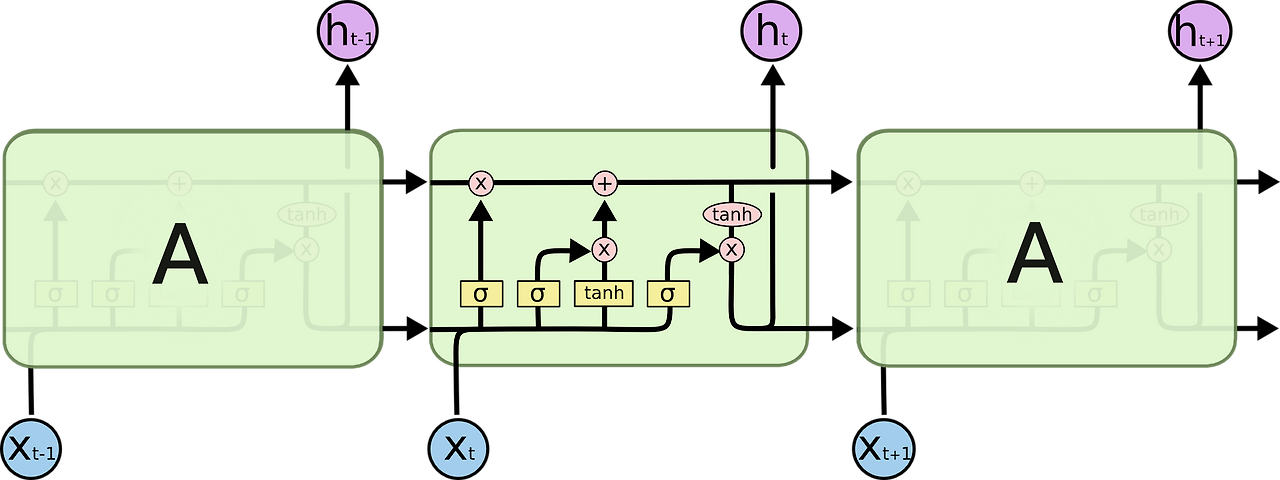

In [32]:
# 패딩 (리뷰 길이 맞추기)
maxlen = 200
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [33]:
from tensorflow.keras.layers import Embedding, LSTM

# 모델
model = models.Sequential([
    Embedding(num_words, 128, input_length=maxlen),
    LSTM(128),
    Dense(1, activation='sigmoid')  # 이진 분류
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [35]:
# 학습
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# 평가
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("IMDB Test Accuracy:", acc)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 154s 490ms/step - accuracy: 0.9754 - loss: 0.0759 - val_accuracy: 0.8556 - val_loss: 0.5151
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 216s 537ms/step - accuracy: 0.9797 - loss: 0.0600 - val_accuracy: 0.8596 - val_loss: 0.5388
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 198s 526ms/step - accuracy: 0.9867 - loss: 0.0425 - val_accuracy: 0.8412 - val_loss: 0.6075
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 524ms/step - accuracy: 0.9850 - loss: 0.0453 - val_accuracy: 0.8252 - val_loss: 0.6255
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 200s 518ms/step - accuracy: 0.9907 - loss: 0.0311 - val_accuracy: 0.8352 - val_loss: 0.6498
IMDB Test Accuracy: 0.8343600034713745
